In [8]:

import pyspark
from pyspark.sql.functions import *
from pyspark.sql import SparkSession 
from pyspark.conf import SparkConf
from pyspark.context import SparkContext
conf = SparkConf().setAppName("DataVisualization").setMaster("local")
sc = SparkSession.builder.config("spark.driver.host", "localhost") \
.config ("spark.sql.execution.arrow.enabled", "true").getOrCreate()
#.config ("spark.sql.shuffle.partitions", "50") \
#.config("spark.driver.maxResultSize","5g") \


# Read Credit Card Info from DB to a Data Frame
df_loan=sc.read.format("jdbc").options(driver="com.mysql.cj.jdbc.Driver",\
                                     user="root",\
                                     password="lakshmi",\
                                     url="jdbc:mysql://localhost:3306/creditcard_capstone",\
                                     dbtable="creditcard_capstone.CDW_SAPP_loan_application").load()

df_loan.show()

+--------------+------------------+--------------+----------+---------+------+------+-------+-------------+-------------+
|Application_ID|Application_Status|Credit_History|Dependents|Education|Gender|Income|Married|Property_Area|Self_Employed|
+--------------+------------------+--------------+----------+---------+------+------+-------+-------------+-------------+
|      LP001953|                 Y|             1|         1| Graduate|  Male|medium|    Yes|    Semiurban|           No|
|      LP001002|                 Y|             1|         0| Graduate|  Male|medium|     No|        Urban|           No|
|      LP001520|                 Y|             1|         0| Graduate|  Male|medium|    Yes|    Semiurban|           No|
|      LP001744|                 Y|             1|         0| Graduate|  Male|   low|     No|    Semiurban|           No|
|      LP002448|                 N|             0|         0| Graduate|  Male|   low|    Yes|        Rural|           No|
|      LP001954|        

In [47]:
df_loan_pd_male= df_loan.filter((df_loan.Married == 'Yes') & (df_loan.Gender == 'Male') )\
        .groupBy('Income', 'Application_Status') \
        .agg(count('Application_ID').alias('Transaction Count')) \
        .sort('Transaction Count').show()

+------+------------------+-----------------+
|Income|Application_Status|Transaction Count|
+------+------------------+-----------------+
|  high|                 N|                9|
|  high|                 Y|               17|
|medium|                 N|               32|
|   low|                 N|               46|
|medium|                 Y|               83|
|   low|                 Y|              119|
+------+------------------+-----------------+



C:\Spark\python\pyspark\sql\pandas\conversion.py:114: UserWarning: toPandas attempted Arrow optimization because 'spark.sql.execution.arrow.pyspark.enabled' is set to true; however, failed by the reason below:
  PyArrow >= 1.0.0 must be installed; however, it was not found.
Attempting non-optimization as 'spark.sql.execution.arrow.pyspark.fallback.enabled' is set to true.
  warn(msg)
C:\Spark\python\pyspark\sql\pandas\conversion.py:114: UserWarning: toPandas attempted Arrow optimization because 'spark.sql.execution.arrow.pyspark.enabled' is set to true; however, failed by the reason below:
  PyArrow >= 1.0.0 must be installed; however, it was not found.
Attempting non-optimization as 'spark.sql.execution.arrow.pyspark.fallback.enabled' is set to true.
  warn(msg)


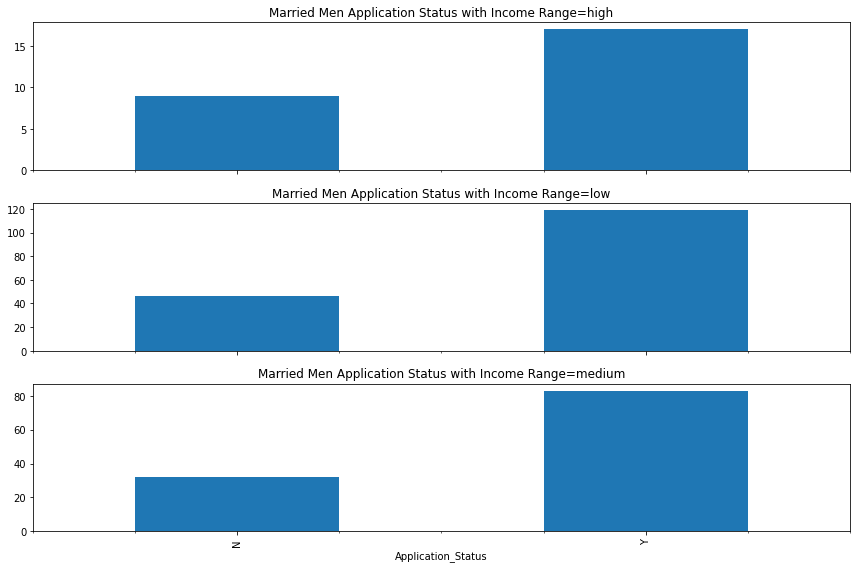

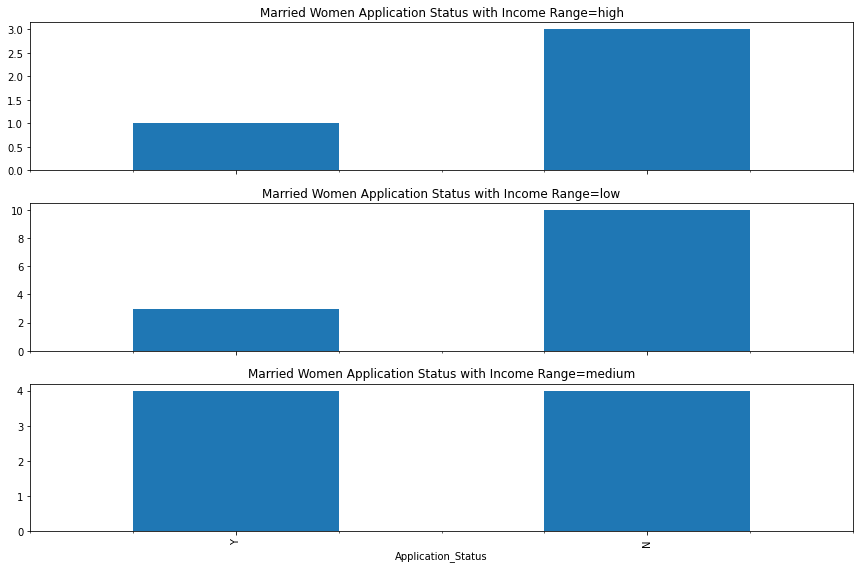

In [71]:
df_loan_pd_male= df_loan.filter((df_loan.Married == 'Yes') & (df_loan.Gender == 'Male') )\
        .groupBy('Income', 'Application_Status') \
        .agg(count('Application_ID').alias('Transaction Count')) \
        .sort('Transaction Count').toPandas()

g = df_loan_pd_male.groupby('Income')
fig, axes = plt.subplots(g.ngroups, sharex=True, figsize=(12, 8))

for i, (Income, d) in enumerate(g):
    ax = d.plot.bar(x='Application_Status', y='Transaction Count', ax=axes[i], title=Income)
    ax.legend().remove()
    ax.set_title('Married Men Application Status with Income Range=%s'%Income)

fig.tight_layout()


df_loan_pd_female= df_loan.filter((df_loan.Married == 'Yes') & (df_loan.Gender == 'Female') )\
        .groupBy('Income', 'Application_Status') \
        .agg(count('Application_ID').alias('Transaction Count')) \
        .sort('Transaction Count').toPandas()

g = df_loan_pd_female.groupby('Income')
fig, axes = plt.subplots(g.ngroups, sharex=True, figsize=(12, 8))

for i, (Income, d) in enumerate(g):
    ax = d.plot.bar(x='Application_Status', y='Transaction Count', ax=axes[i], title=Income)
    ax.legend().remove()
    ax.set_title('Married Women Application Status with Income Range=%s'%Income)

fig.tight_layout()


In [76]:
df_loan \
        .groupBy('Property_Area', 'Application_Status') \
        .agg(count('Application_ID').alias('Transaction Count')) \
        .sort('Property_Area', 'Application_Status').show()

+-------------+------------------+-----------------+
|Property_Area|Application_Status|Transaction Count|
+-------------+------------------+-----------------+
|        Rural|                 N|               59|
|        Rural|                 Y|               90|
|    Semiurban|                 N|               44|
|    Semiurban|                 Y|              153|
|        Urban|                 N|               61|
|        Urban|                 Y|              104|
+-------------+------------------+-----------------+



C:\Spark\python\pyspark\sql\pandas\conversion.py:114: UserWarning: toPandas attempted Arrow optimization because 'spark.sql.execution.arrow.pyspark.enabled' is set to true; however, failed by the reason below:
  PyArrow >= 1.0.0 must be installed; however, it was not found.
Attempting non-optimization as 'spark.sql.execution.arrow.pyspark.fallback.enabled' is set to true.
  warn(msg)


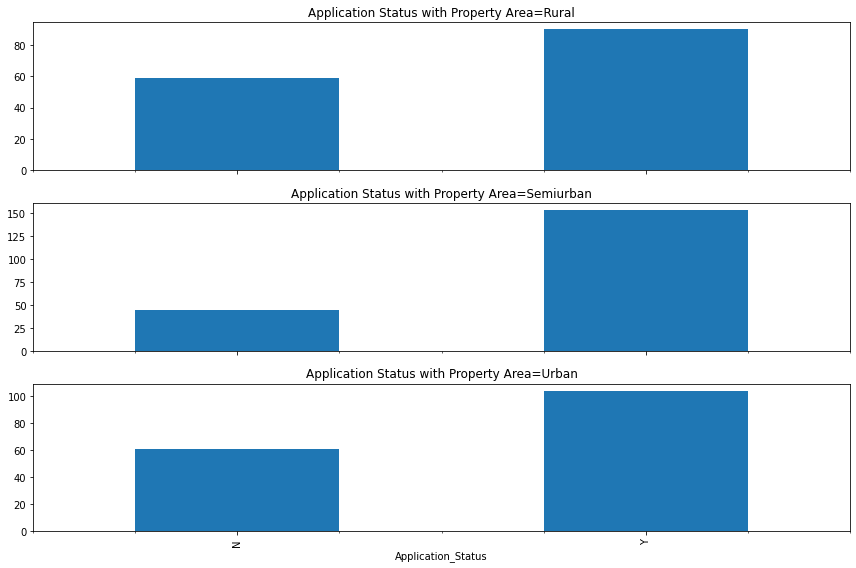

In [75]:
df_loan_pd= df_loan \
        .groupBy('Property_Area', 'Application_Status') \
        .agg(count('Application_ID').alias('Transaction Count')) \
        .sort('Property_Area', 'Application_Status').toPandas()

g = df_loan_pd.groupby('Property_Area')
fig, axes = plt.subplots(g.ngroups, sharex=True, figsize=(12, 8))

for i, (Property_Area, d) in enumerate(g):
    ax = d.plot.bar(x='Application_Status', y='Transaction Count', ax=axes[i], title=Property_Area)
    ax.legend().remove()
    ax.set_title('Application Status with Property Area=%s'%Property_Area)

fig.tight_layout()


C:\Spark\python\pyspark\sql\pandas\conversion.py:114: UserWarning: toPandas attempted Arrow optimization because 'spark.sql.execution.arrow.pyspark.enabled' is set to true; however, failed by the reason below:
  PyArrow >= 1.0.0 must be installed; however, it was not found.
Attempting non-optimization as 'spark.sql.execution.arrow.pyspark.fallback.enabled' is set to true.
  warn(msg)
C:\Spark\python\pyspark\sql\pandas\conversion.py:114: UserWarning: toPandas attempted Arrow optimization because 'spark.sql.execution.arrow.pyspark.enabled' is set to true; however, failed by the reason below:
  PyArrow >= 1.0.0 must be installed; however, it was not found.
Attempting non-optimization as 'spark.sql.execution.arrow.pyspark.fallback.enabled' is set to true.
  warn(msg)
C:\Spark\python\pyspark\sql\pandas\conversion.py:114: UserWarning: toPandas attempted Arrow optimization because 'spark.sql.execution.arrow.pyspark.enabled' is set to true; however, failed by the reason below:
  PyArrow >= 1.0

<AxesSubplot:title={'center':'Approved Application by Self Employed'}, xlabel='Self_Employed'>

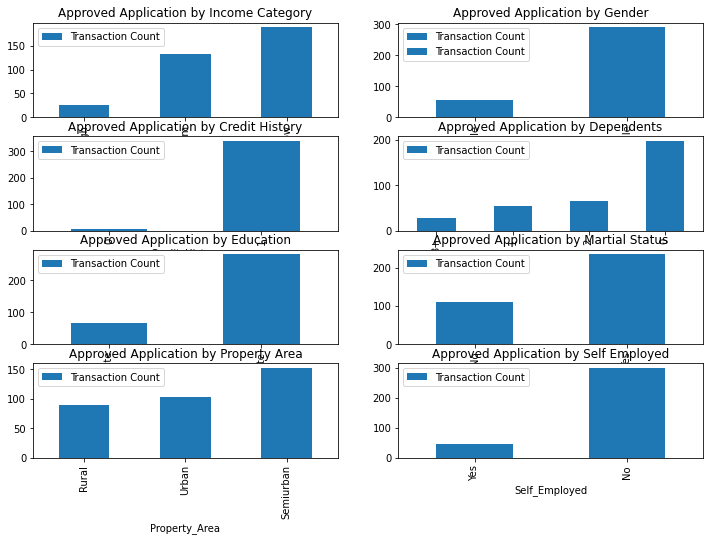

In [88]:
from turtle import title

df_loan_income = df_loan.filter(df_loan.Application_Status=='Y') \
        .groupBy('Income') \
        .agg(count('Application_ID').alias('Transaction Count')) \
        .sort('Transaction Count').toPandas()

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 8))

df_loan_income.plot.bar(x='Income', ax=axes[0][0], y='Transaction Count', title='Approved Application by Income Category')

df_loan_gender = df_loan.filter(df_loan.Application_Status=='Y') \
        .groupBy('Gender') \
        .agg(count('Application_ID').alias('Transaction Count')) \
        .sort('Transaction Count').toPandas()

df_loan_gender.plot.bar(x='Gender', ax=axes[0][1], y='Transaction Count', title='Approved Application by Gender')

df_loan_gender = df_loan.filter(df_loan.Application_Status=='Y') \
        .groupBy('Gender') \
        .agg(count('Application_ID').alias('Transaction Count')) \
        .sort('Transaction Count').toPandas()

df_loan_gender.plot.bar(x='Gender', ax=axes[0][1], y='Transaction Count', title='Approved Application by Gender')


df_loan_Credit_History = df_loan.filter(df_loan.Application_Status=='Y') \
        .groupBy('Credit_History') \
        .agg(count('Application_ID').alias('Transaction Count')) \
        .sort('Transaction Count').toPandas()

df_loan_Credit_History.plot.bar(x='Credit_History', ax=axes[1][0], y='Transaction Count', title='Approved Application by Credit History')


df_loan_Dependents = df_loan.filter(df_loan.Application_Status=='Y') \
        .groupBy('Dependents') \
        .agg(count('Application_ID').alias('Transaction Count')) \
        .sort('Transaction Count').toPandas()

df_loan_Dependents.plot.bar(x='Dependents', ax=axes[1][1], y='Transaction Count', title='Approved Application by Dependents')


df_loan_Education = df_loan.filter(df_loan.Application_Status=='Y') \
        .groupBy('Education') \
        .agg(count('Application_ID').alias('Transaction Count')) \
        .sort('Transaction Count').toPandas()

df_loan_Education.plot.bar(x='Education', ax=axes[2][0], y='Transaction Count', title='Approved Application by Education')


df_loan_Married = df_loan.filter(df_loan.Application_Status=='Y') \
        .groupBy('Married') \
        .agg(count('Application_ID').alias('Transaction Count')) \
        .sort('Transaction Count').toPandas()

df_loan_Married.plot.bar(x='Married', ax=axes[2][1], y='Transaction Count', title='Approved Application by Martial Status')

df_loan_Property_Area = df_loan.filter(df_loan.Application_Status=='Y') \
        .groupBy('Property_Area') \
        .agg(count('Application_ID').alias('Transaction Count')) \
        .sort('Transaction Count').toPandas()

df_loan_Property_Area.plot.bar(x='Property_Area', ax=axes[3][0], y='Transaction Count', title='Approved Application by Property Area')


df_loan_Self_Employed = df_loan.filter(df_loan.Application_Status=='Y') \
        .groupBy('Self_Employed') \
        .agg(count('Application_ID').alias('Transaction Count')) \
        .sort('Transaction Count').toPandas()

df_loan_Self_Employed.plot.bar(x='Self_Employed', ax=axes[3][1], y='Transaction Count', title='Approved Application by Self Employed')
